<a href="https://colab.research.google.com/github/QuinnKun/-Titanic/blob/master/Copy_of_Valuation_Accuracy_TPS_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At Opendoor, we care a lot about ensuring high valuation accuracy. We have a combination of human and algorithmic valuators who -- in both training scenarios and in production -- produce numerous valuations for different homes.

Given a **manually-entered** dataset of multiple valuators’ *valuations* (keyed by *valuator_id*) of different homes (keyed by *home_id*), evaluated against their ultimate *close_prices*.

1.   We wish to understand the performance of our valuators. Define and calculate some metrics that will help us understand valuator performance. [max 10m] 
2.   How similar are our valuators’ estimates to one another? What implications does this have for reducing error via combining estimates? [max 15m]
3.   Create and evaluate a rule that will combine valuations to achieve higher accuracy than any individual valuator. [max 15m]
4.   Considering operational and cost constraints, design a system that will help us trade off among our key business objectives. [remaining time]

Sample data
```
  home_id close_price valuator_id valuation
    <int>       <dbl> <chr>           <dbl>
         1     220674. V1            222988.
         1     220674. V2            226617.
         1     220674. V3            229378.
         1     220674. V4            214982.
         1     220674. V5            224865.
         2     251957. V1            248071.
         ...
```

To begin, click "Runtime" in the menu bar at the top and hit "Run all".

In [1]:
import pandas as pd

In [2]:
val_df = pd.read_json("{\"home_id\":[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10,11,11,11,11,11,12,12,12,12,12,13,13,13,13,13,14,14,14,14,14,15,15,15,15,15,16,16,16,16,16,17,17,17,17,17,18,18,18,18,18,19,19,19,19,19,20,20,20,20,20,21,21,21,21,21,22,22,22,22,22,23,23,23,23,23,24,24,24,24,24,25,25,25,25,25,26,26,26,26,26,27,27,27,27,27,28,28,28,28,28,29,29,29,29,29,30,30,30,30,30,31,31,31,31,31,32,32,32,32,32,33,33,33,33,33,34,34,34,34,34,35,35,35,35,35,36,36,36,36,36,37,37,37,37,37,38,38,38,38,38,39,39,39,39,39,40,40,40,40,40,41,41,41,41,41,42,42,42,42,42,43,43,43,43,43,44,44,44,44,44,45,45,45,45,45,46,46,46,46,46,47,47,47,47,47,48,48,48,48,48,49,49,49,49,49,50,50,50,50,50],\"close_price\":[254086.656793083,254086.656793083,254086.656793083,254086.656793083,254086.656793083,262215.028102715,262215.028102715,262215.028102715,262215.028102715,262215.028102715,247910.355609613,247910.355609613,247910.355609613,247910.355609613,247910.355609613,242570.06975142,242570.06975142,242570.06975142,242570.06975142,242570.06975142,270866.524198589,270866.524198589,270866.524198589,270866.524198589,270866.524198589,284386.850716474,284386.850716474,284386.850716474,284386.850716474,284386.850716474,177907.113553244,177907.113553244,177907.113553244,177907.113553244,177907.113553244,267182.186657375,267182.186657375,267182.186657375,267182.186657375,267182.186657375,261241.73220336,261241.73220336,261241.73220336,261241.73220336,261241.73220336,237241.968353318,237241.968353318,237241.968353318,237241.968353318,237241.968353318,278530.384227304,278530.384227304,278530.384227304,278530.384227304,278530.384227304,238322.884548449,238322.884548449,238322.884548449,238322.884548449,238322.884548449,241470.080146013,241470.080146013,241470.080146013,241470.080146013,241470.080146013,275722.293342394,275722.293342394,275722.293342394,275722.293342394,275722.293342394,301588.818973618,301588.818973618,301588.818973618,301588.818973618,301588.818973618,258101.647028117,258101.647028117,258101.647028117,258101.647028117,258101.647028117,237334.479706371,237334.479706371,237334.479706371,237334.479706371,237334.479706371,214326.601154212,214326.601154212,214326.601154212,214326.601154212,214326.601154212,240069.01063363,240069.01063363,240069.01063363,240069.01063363,240069.01063363,221805.120204699,221805.120204699,221805.120204699,221805.120204699,221805.120204699,242232.022506436,242232.022506436,242232.022506436,242232.022506436,242232.022506436,261831.375046647,261831.375046647,261831.375046647,261831.375046647,261831.375046647,224444.287239284,224444.287239284,224444.287239284,224444.287239284,224444.287239284,329475.006432846,329475.006432846,329475.006432846,329475.006432846,329475.006432846,254680.350269952,254680.350269952,254680.350269952,254680.350269952,254680.350269952,283906.218023648,283906.218023648,283906.218023648,283906.218023648,283906.218023648,181326.280604797,181326.280604797,181326.280604797,181326.280604797,181326.280604797,272230.034715863,272230.034715863,272230.034715863,272230.034715863,272230.034715863,210512.645186453,210512.645186453,210512.645186453,210512.645186453,210512.645186453,277594.110328274,277594.110328274,277594.110328274,277594.110328274,277594.110328274,261943.904663559,261943.904663559,261943.904663559,261943.904663559,261943.904663559,237774.142621907,237774.142621907,237774.142621907,237774.142621907,237774.142621907,289727.758905318,289727.758905318,289727.758905318,289727.758905318,289727.758905318,228963.049922592,228963.049922592,228963.049922592,228963.049922592,228963.049922592,232581.570872784,232581.570872784,232581.570872784,232581.570872784,232581.570872784,219967.834569237,219967.834569237,219967.834569237,219967.834569237,219967.834569237,229954.641797398,229954.641797398,229954.641797398,229954.641797398,229954.641797398,278355.548601192,278355.548601192,278355.548601192,278355.548601192,278355.548601192,263011.064486355,263011.064486355,263011.064486355,263011.064486355,263011.064486355,280154.776530311,280154.776530311,280154.776530311,280154.776530311,280154.776530311,238296.44007839,238296.44007839,238296.44007839,238296.44007839,238296.44007839,261291.108753239,261291.108753239,261291.108753239,261291.108753239,261291.108753239,257324.947734595,257324.947734595,257324.947734595,257324.947734595,257324.947734595,207212.279728524,207212.279728524,207212.279728524,207212.279728524,207212.279728524,303352.878624264,303352.878624264,303352.878624264,303352.878624264,303352.878624264,254033.42982801,254033.42982801,254033.42982801,254033.42982801,254033.42982801,272967.969974736,272967.969974736,272967.969974736,272967.969974736,272967.969974736,278654.100307269,278654.100307269,278654.100307269,278654.100307269,278654.100307269,248483.028956732,248483.028956732,248483.028956732,248483.028956732,248483.028956732,240825.537406991,240825.537406991,240825.537406991,240825.537406991,240825.537406991],\"valuator_id\":[\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\",\"V1\",\"V2\",\"V3\",\"V4\",\"V5\"],\"valuation\":[255134.834485405,260066.519532166,268071.787817652,254289.709353301,261199.691465977,259527.443153745,265106.213136897,275566.901656964,257593.088368332,262514.345666911,248395.870950347,253199.079454137,265863.678571392,249839.887932312,253490.438105186,239345.447178402,240972.172431815,244458.822339622,235442.204146198,236499.254486342,278207.994702035,275002.949779888,274207.616293474,274097.108471602,272786.348839321,292770.995458653,296301.563815943,304830.66051826,284513.633304532,28495197.8720433,176815.400070185,182010.402376131,187300.388486845,170103.864515264,179346.627406192,263183.925715637,270526.758801197,274885.916596351,261379.766894796,263743.955537899,264774.556389416,264984.34344278,268915.632984732,259515.634930838,258642.009259784,236171.298337479,247333.221151283,249530.690186613,230079.644255669,243010.372706414,292158.89496363,276562.33753911,282715.222178206,271030.340880117,277833.889037267,238672.575278634,240197.536826469,247816.810937683,235297.322442872,239284.828542675,243926.924786017,253245.608763205,253105.442588627,238842.864659618,248333.627908697,272798.993958682,289497.064267795,291710.799227994,283325.525587196,292086.298393903,299570.165040666,300296.395906178,309109.11119807,295137.569129328,297510.343377687,258946.863694545,261309.774185602,272372.164725738,250712.012551147,265071.712627161,228638.24667684,241117.897830194,245952.420245732,235904.96989211,239822.981837718,222672.61443829,216071.236110747,217679.893055436,213411.86426411,212368.245302534,241939.353516564,242416.490112141,248217.942746641,233759.406316586,238146.770690131,233065.793995612,224713.994357388,230039.343018673,217934.488869254,223814.999471418,245785.967609541,243468.623714634,244098.514666137,233836.363041546,248628.286102388,259499.574554309,266583.301940199,268008.899851115,254433.883048352,259882.764479172,227482.136441562,229274.450292728,232766.777060764,222240.363807908,229179.245533762,322239.397728181,342366.033928037,346719.712431529,33626844.1027864,340941.10884519,24951171.2420993,257122.033456689,258572.714684013,251470.529009668,255053.483446312,285229.289455109,289765.291665277,298814.912908947,279800.842279552,284653.512218937,178980.895650474,186866.44778061,190969.939552412,178543.396579724,186885.068417357,270204.65886658,284528.480456905,284330.914282396,27364263.6104589,287447.155014039,210209.710358823,215732.175942865,223200.642368992,209005.690277888,218364.547240226,275338.175921573,279589.481238899,286322.637291232,271154.080483742,281278.801801051,261087.066971912,261789.60167484,263376.111690656,257413.406398545,257189.343551239,236982.610130921,243729.249510607,240766.682953444,237482.296737285,246656.612114669,295924.417454599,295319.526356787,296788.721385922,28605513.9008779,291988.200928896,221567.133512405,229398.482438328,240330.112474124,230943.964801322,229718.950129719,233534.503955404,244480.032931184,248465.468546151,-235264.808209346,242475.32049622,220994.866682512,223091.414119719,231864.640322765,222084.973797192,-226411.435051957,234519.055073235,235897.541106059,243550.758098731,226762.07466458,237975.792384182,276811.872630478,283007.523851897,285501.156502045,279849.306481771,281599.095820578,266308.040582414,261069.871564181,271427.970578126,257114.989877174,260289.755985879,282492.06907741,281873.780968694,287007.871315994,277048.237004163,278119.087169862,235462.154962036,238498.769615953,250937.734207939,238727.067023325,242975.678550685,266745.798124844,270050.157205802,275324.983135067,257639.481098322,264345.072630672,263863.665841277,255491.954898645,265669.329140506,256096.451278474,257991.906706471,211345.807106016,209579.680812597,212916.17469508,202724.918161256,211247.893149227,310027.564556124,308289.559239202,320102.933430402,307669.883507716,307544.422325133,255740.434695621,261798.281924624,262200.258346709,260245.838982272,260799.617673027,267336.583114866,281522.349830072,279158.854651009,263940.657076489,275054.971400102,276960.349450775,280385.378787663,284495.320171568,275536.794906958,276226.919118749,242442.933179126,250385.182616562,258267.14591028,247266.842660414,254014.703336957,239767.128603376,237069.476422985,249811.783614102,236652.888778894,240036.120019573]}")

In [ ]:
val_df.head()

,home_id,close_price,valuator_id,valuation
0,1,254086.656793,V1,255134.834485
1,1,254086.656793,V2,260066.519532
2,1,254086.656793,V3,268071.787818
3,1,254086.656793,V4,254289.709353
4,1,254086.656793,V5,261199.691466


In [ ]:
val_df.describe()

,home_id,close_price,valuation
count,250.000000,250.000000,2.500000e+02
mean,25.500000,252719.763012,8.185118e+05
std,14.459818,29080.727965,3.998521e+06
min,1.000000,177907.113553,-2.352648e+05
25%,13.000000,237334.479706,2.376057e+05
50%,25.500000,254383.503532,2.573014e+05
75%,38.000000,272967.969975,2.760619e+05
max,50.000000,329475.006433,3.362684e+07


In [ ]:
val_df.valuator_id.value_counts()

V4    50
V3    50
V5    50
V1    50
V2    50
Name: valuator_id, dtype: int64

In [ ]:
import numpy as np
val_df["val_off"] = np.abs(val_df["valuation"]-val_df["close_price"])

In [ ]:
val_df.groupby("valuator_id")["val_off"].agg(["var","mean"])

,var,mean
valuator_id,,
V1,1.219471e+13,4.975379e+05
V2,1.299189e+07,4.761068e+03
V3,2.056640e+07,9.562655e+03
V4,5.071440e+13,1.787128e+06
V5,1.590573e+13,5.774102e+05


In [ ]:
val_df.groupby("valuator_id").agg("mean")

,home_id,close_price,valuation,val_off
valuator_id,,,,
V1,25.5,252719.763012,7.474555e+05,4.975379e+05
V2,25.5,252719.763012,2.569791e+05,4.761068e+03
V3,25.5,252719.763012,2.622824e+05,9.562655e+03
V4,25.5,252719.763012,2.014985e+06,1.787128e+06
V5,25.5,252719.763012,8.108571e+05,5.774102e+05


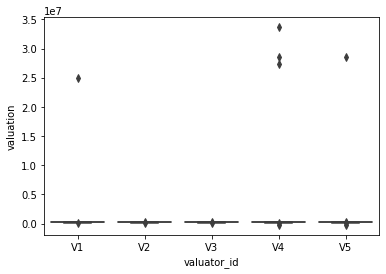

In [ ]:
import seaborn as sns
sns.boxplot(x = 'valuator_id', y = 'valuation', data = val_df) 

In [ ]:
val_df[val_df["valuation"]>24000000]

,home_id,close_price,valuator_id,valuation,val_off
29,6,284386.850716,V5,2.849520e+07,2.821081e+07
118,24,329475.006433,V4,3.362684e+07,3.329737e+07
120,25,254680.350270,V1,2.495117e+07,2.469649e+07
138,28,272230.034716,V4,2.736426e+07,2.709203e+07
163,33,289727.758905,V4,2.860551e+07,2.831579e+07


In [ ]:
df = val_df
df.loc[val_df["valuation"]>24000000,"valuation"] = df.loc[val_df["valuation"]>24000000,"valuation"]/100

In [ ]:
df[val_df["valuation"]>24000000]

,home_id,close_price,valuator_id,valuation,val_off


In [ ]:
df["val_off"] = np.abs(df["valuation"]-df["close_price"])

In [ ]:
df.groupby("valuator_id")["val_off"].agg(["var","mean"])

,var,mean
valuator_id,,
V1,9.024098e+06,3711.416552
V2,1.299189e+07,4761.067582
V3,2.056640e+07,9562.655420
V4,4.309476e+09,13261.855201
V5,3.920258e+09,13205.266352


In [ ]:
# simple
total_variance = df.val_off.var()

In [ ]:
in_group_variance= np.sum(df.groupby("valuator_id")["val_off"].agg("var"))

In [ ]:
F score = within variance / df / error vairance / df

In [ ]:
# similarity of paris
# consine similairty/ geometric

np.sum((df.loc[df.valuator_id=="V1",["valuation"]].values -df.loc[df.valuator_id=="V2",["valuation"]].values )**2)

2770749054.0070214

In [ ]:
v1.value 

In [ ]:
VAR(avg(v1 to v5) ) = VAR(V1 。。。V5)/ 5

In [ ]:
df.loc[df.valuator_id==1,["valuation"]]

,valuation


In [ ]:
df["val_diff"] = df["valuation"]-df["close_price"]

In [ ]:
df.groupby("valuator_id")["val_diff"].mean()

valuator_id
V1      702.512338
V2     4259.350910
V3     9562.655420
V4   -11747.812283
V5    -6067.548594
Name: val_diff, dtype: float64

In [ ]:
def bias_adjust(gp):
  res = gp[gp.valuator_id=="V1", "valuation"] -702.512338 +\
  gp[gp.valuator_id=="V2", "valuation"]- 4259.350910 +\
  gp[gp.valuator_id=="V3", "valuation"]- 9562.655420 +\
  gp[gp.valuator_id=="V4", "valuation"] +11747.812283 +\
  gp[gp.valuator_id=="V5", "valuation"] +6067.548594
  return res

df["valuation"]=df.groupby("home_id").apply(bias_adjust)

TypeError: ignored

In [ ]:
val_df["val_off"] = np.abs(val_df["valuation"]-val_df["close_price"])